# Analyzing Spotify's Top 50 Songs from 2010-2019

This dataset was acquired through [Kaggle](https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year) and it goes through the top 50 songs by year in the world by Spotify. There are many ways in which we can be analyzing the data, but in this instance, I'd love to understand the broader music trends that we are seeing throughout the years and derive insights as to what type of music we'll be able to predict that will be popular in 2020. 

### Reading the Dataset

Here is a sample of what this dataset looks like below:

In [35]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("top10s.csv", engine='python')

df.set_index(['Unnamed: 0'], inplace=True)
df.sample(5)

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Unnamed: 0,,,,,,,,,,,,,,
523,Silence,Marshmello,brostep,2018,142,76,52,-3,17,29,181,26,9,82
598,Con Calma - Remix,Daddy Yankee,latin,2019,94,87,74,-3,4,61,181,17,5,76
539,Youth (feat. Khalid),Shawn Mendes,canadian pop,2018,100,60,53,-7,13,32,191,56,12,75
434,Higher,Carly Rae Jepsen,canadian pop,2016,114,87,65,-5,37,44,234,1,6,46
317,I Lived,OneRepublic,dance pop,2015,120,85,59,-5,27,34,235,7,4,67


In [36]:
# Overall insights about the dataset
df.describe()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


In [37]:
df[df['year'] == 2019]

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Unnamed: 0,,,,,,,,,,,,,,
573,Memories,Maroon 5,pop,2019,91,32,76,-7,8,57,189,84,5,99
574,Lose You To Love Me,Selena Gomez,dance pop,2019,102,34,51,-9,21,9,206,58,4,97
575,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,11,45,182,75,3,96
576,Señorita,Shawn Mendes,canadian pop,2019,117,54,76,-6,9,75,191,4,3,95
577,How Do You Sleep?,Sam Smith,pop,2019,111,68,48,-5,8,35,202,15,9,93
578,South of the Border (feat. Camila Cabello & Ca...,Ed Sheeran,pop,2019,98,62,86,-6,9,67,204,15,8,92
579,Trampoline (with ZAYN),SHAED,electropop,2019,127,46,62,-6,14,50,184,56,3,92
580,Happier,Marshmello,brostep,2019,100,79,69,-3,17,67,214,19,5,90
581,Truth Hurts,Lizzo,escape room,2019,158,62,72,-3,12,41,173,11,11,90


We have good data to work with, to keep our analysis focused we will be focusing on the following columns. The description for the features are outlined in the [Spotify Web API Guidance](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/) page. 
* **Beats Per Minute**: The tempo of the song. The average BPM is at 119. 

* **Energy**: a measure from 0 to 100, and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

* **Danceability**: describes the suitability of a track for dancing. This is based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0 is least danceable and 100 is most danceable.

* **Acousticness**: a confidence measure from 0 to 100 of whether the track is acoustic. 100 represents high confidence that the track is acoustic. Acoustic music, based on this entry from [Wikipedia](https://en.wikipedia.org/wiki/Acoustic_music), "When music is labeled acoustic, unplugged, or unwired, the assumption seems to be that other types of music are cluttered by technology and overproduction and therefore aren't as pure". So one would think that these two values would coincide with one another.

* **Valence**: a measure from 0 to 100 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (for example happy, cheerful, euphoric), while tracks with low valence sound more negative (for example sad, depressed, angry).

* **Popularity**: The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity. In short, popularity will be biased towards newer music, but what we can do is look at the earlier part of the decade and determine just how timeless that music was.:




And omitting the following: 
* **Duration (dur)** - Anecdotally speaking, listeners don't choose certain songs over others based on the length.
* **Speechiness (spch)** - According to Spotify, Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. This is irrelevant for our analysis since there's actually not a lot of rap music in this dataset.
* **Liveness (live)** - Detects audience in the recording. I wouldn't expect people to listen to live music on Spotify with the audience cheering in the background when a studio version exists.
* **dB** - There is a low variation in results for dB, which makes it difficult to derive insights.

# How Music Has Whole Evolved Throughout the Years

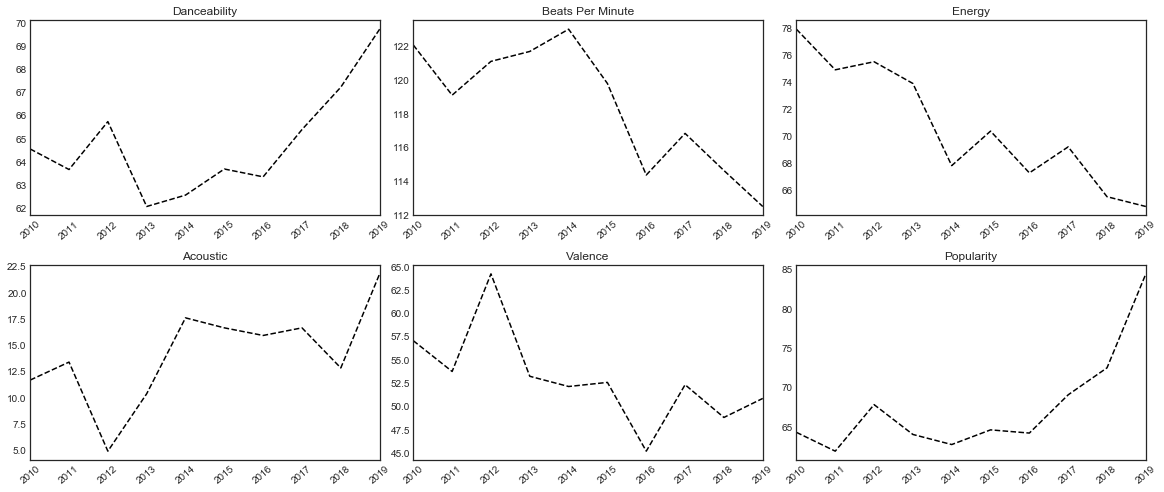

In [38]:
df_pivot = df.pivot_table(index='year', aggfunc='mean')
plt.style.use('seaborn-white')
plt.figure(figsize=(16, 10))

plt.subplot(331)
df_pivot['dnce'].plot.line(color='black', style='--')
plt.title('Danceability')
plt.xlabel('')
#plt.ylabel('danceability')
plt.xticks(rotation=40)

plt.subplot(332)
df_pivot['bpm'].plot.line(color='black', style='--')
plt.title('Beats Per Minute')
plt.xlabel('')
#plt.ylabel('BPM')
plt.xticks(rotation=40)

plt.subplot(333)
df_pivot['nrgy'].plot.line(color='black', style='--')
plt.title('Energy')
plt.xlabel('')
#plt.ylabel('Energy')
plt.xticks(rotation=40)

plt.subplot(334)
df_pivot['acous'].plot.line(color='black', style='--')
plt.title('Acoustic')
plt.xlabel('')
#plt.ylabel('acoustic')
plt.xticks(rotation=40)

plt.subplot(335)
df_pivot['val'].plot.line(color='black', style='--')
plt.title('Valence')
plt.xlabel('')
#plt.ylabel('valence')
plt.xticks(rotation=40)

plt.subplot(336)
df_pivot['pop'].plot.line(color='black', style='--')
plt.title('Popularity')
plt.xlabel('')
plt.xticks(rotation=40)

plt.tight_layout()

### Instant Reactions

Looking at these charts, we're able to note some interesting things with the data and how music as a whole is trending throughout the years. Let's dig into a few things that I've noticed...

#### Let's keep dancing... by dropping the BPM?

This is a little surprising to see, as `Danceability` has gone up to its highest levels in 2019, BPM and Energy of music has trended down to its lowest. To help conceptualize BPM, 120 BPM's is the double of 60 BPM's which is the sound of a clock. Listeners are more comfortable with listening to sounds with tempos around this digit as we have internalized the sound of the division of a minute in a clock. With that, BPM under 113 is not very fast. 

Below are a few of the songs in 2019 that fit the profile of high danceability, and lower BPM and Energy:

In [39]:
df[(df['year'] == 2019) & (df['dnce'] > 69) & (df['bpm'] < 113) & (df['nrgy'] < 65)]

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Unnamed: 0,,,,,,,,,,,,,,
573,Memories,Maroon 5,pop,2019,91,32,76,-7,8,57,189,84,5,99
578,South of the Border (feat. Camila Cabello & Ca...,Ed Sheeran,pop,2019,98,62,86,-6,9,67,204,15,8,92
584,Only Human,Jonas Brothers,boy band,2019,94,50,80,-6,6,87,183,11,7,87
595,No Guidance (feat. Drake),Chris Brown,dance pop,2019,93,45,70,-7,16,14,261,12,15,81


What's interesting to note is that these artists are all well-known names in the industry and have been mentioned on this list during the early parts of this decade. Perhaps individuals leading the charge in ushering this new change in music?

#### Back to a purer sound of music

Furthermore, a preference for an `acoustic` sound seems to be more on the rise, and quite drastically, from where it was a few years ago. 

Text(0.5, 1.0, 'Acoustic Ratings by Year')

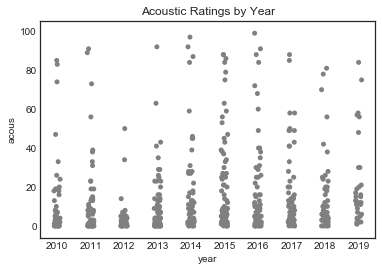

In [40]:
sns.stripplot(x='year',y='acous', data=df, jitter=True, color='gray')
plt.title("Acoustic Ratings by Year")

The strip plot above shows that there is more balance in 2019 to songs that have varying levels of `acoustic` ratings. Notice how other years tend to cluster more towards the bottom of the graph, while 2019 is spread out.

#### Major mood shifts every 4 years

Under `valence`, we saw a major spike in positive, upbeat music in 2012:

In [41]:
print('Valence Ratings in 2012:')
df_12 = df[df['year'] == 2012]
avg_val_12 = round(df_12['val'].mean(),2)
median_val_12 = round(df_12['val'].median(),2)
print('Mean: ' + str(avg_val_12))
print('Median: ' + str(median_val_12))

Valence Ratings in 2012:
Mean: 64.17
Median: 68.0


And saw a massive downturn in `valence` (happy, upbeat music) in 2016:

In [42]:
print('Valence Ratings in 2016:')
df_16 = df[df['year'] == 2016]
avg_val_16 = round(df_16['val'].mean(),2)
median_val_16 = round(df_16['val'].median(),2)
print('Mean: ' + str(avg_val_16))
print('Median: ' + str(median_val_16))

Valence Ratings in 2016:
Mean: 45.15
Median: 43.0


Could it be due to socio-economic factors that played into the overall mood changing? The biggest thing that comes to mind is the US Presidential Elections taking place in both of those years, which we'll reserve for a more nuanced discussion that could occupy it's own analysis. What's also interesting is that music from 2012 is played more often in this present day (see: `popularity` chart) than any other year from that time of the decade, possibly a nostalgic time for listeners back then. 

Happiest songs of 2012:

In [43]:
df_12.sort_values(by='val', ascending=False).head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Unnamed: 0,,,,,,,,,,,,,,
135,Don't Stop the Party (feat. TJR),Pitbull,dance pop,2012,127,96,72,-4,38,95,206,1,9,59
112,Love You Like A Love Song,Selena Gomez & The Scene,dance pop,2012,117,68,86,-4,7,92,188,8,5,76
109,What Makes You Beautiful,One Direction,boy band,2012,125,79,73,-2,6,89,200,1,7,78
129,The One That Got Away,Katy Perry,dance pop,2012,134,80,69,-4,16,88,227,0,4,67
106,Locked Out of Heaven,Bruno Mars,pop,2012,144,70,73,-4,31,87,233,5,4,79


Saddest songs of 2012:

In [44]:
df_12.sort_values(by='val').head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Unnamed: 0,,,,,,,,,,,,,,
107,Paradise,Coldplay,permanent wave,2012,140,59,45,-7,8,20,279,5,3,79
105,Titanium (feat. Sia),David Guetta,dance pop,2012,126,79,60,-4,13,30,245,7,10,80
124,Boyfriend,Justin Bieber,canadian pop,2012,97,55,72,-6,13,33,171,4,5,71
134,Diamonds,Rihanna,barbadian pop,2012,92,71,56,-5,11,39,225,0,5,61
123,Some Nights,fun.,baroque pop,2012,108,74,67,-7,9,39,277,2,5,72


Happiest songs of 2016:

In [45]:
df_16.sort_values(by='val', ascending=False).head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Unnamed: 0,,,,,,,,,,,,,,
366,Cake By The Ocean,DNCE,dance pop,2016,119,75,77,-5,4,90,219,15,5,81
390,Me Too,Meghan Trainor,dance pop,2016,124,69,93,-6,48,84,181,10,10,73
440,BURNITUP!,Janet Jackson,dance pop,2016,123,71,83,-7,31,83,250,5,18,31
392,Ain't Your Mama,Jennifer Lopez,dance pop,2016,120,68,76,-6,7,82,218,5,23,72
394,Toothbrush,DNCE,dance pop,2016,105,79,55,-6,47,82,232,12,13,72


Saddest songs of 2016:

In [46]:
df_16.sort_values(by='val').head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Unnamed: 0,,,,,,,,,,,,,,
443,Million Years Ago,Adele,british soul,2016,0,0,0,-60,0,0,227,0,0,0
404,Runnin' (Lose It All),Naughty Boy,tropical house,2016,139,85,32,-6,48,8,213,1,8,69
423,Wish That You Were Here - From “Miss Peregrine...,Florence + The Machine,art pop,2016,94,57,37,-6,13,12,403,72,3,57
437,Beautiful Birds (feat. Birdy),Passenger,folk-pop,2016,86,17,39,-13,11,14,214,91,3,36
364,The Hills,The Weeknd,canadian contemporary r&b,2016,113,56,58,-7,14,14,242,7,5,84


##### What could all this mean?

It's not totally surprising that the music today has been getting a bit more melancholic. `BPM`, `Energy`, and `Valence` (albeit slightly) are all trending downwards. With the rise of free streaming services like SoundCloud, independent artists are more discoverable and don't have to follow the rules of traditional pop music. 

Yet with this "slower" sound that we are seeing, `Danceability` continues to rise. 

![Russian kid dancing  at club can't be bothered. 1997.](https://media.giphy.com/media/5n067EUZwH8cvtRfGz/giphy.gif)

Here are a few examples of songs that fit the trend that we are seeing (high danceability & acoustic sound, lower bpm & energy):

In [47]:
df[(df['dnce'] > 69) & (df['bpm'] < 113) & (df['nrgy'] < 65) & (df['acous'] > 20)]

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Unnamed: 0,,,,,,,,,,,,,,
143,Just Give Me a Reason (feat. Nate Ruess),P!nk,dance pop,2013,95,55,78,-7,13,44,243,35,5,81
269,Thinking out Loud,Ed Sheeran,pop,2015,79,45,78,-6,18,59,282,47,3,84
383,Starving,Hailee Steinfeld,dance pop,2016,100,62,73,-4,11,51,182,38,6,78
442,Behind Your Back,Nelly Furtado,canadian latin,2016,98,47,80,-10,7,69,228,25,4,18
445,Closer,The Chainsmokers,electropop,2017,95,52,75,-6,11,66,245,41,3,86
564,Miss You (with Major Lazer & Tory Lanez),Cashmere Cat,downtempo,2018,100,64,75,-5,11,45,186,25,9,64
573,Memories,Maroon 5,pop,2019,91,32,76,-7,8,57,189,84,5,99


##### Next Steps

Now that we have a general sense of the way music is trending, are these changes affecting the way artists are creating their music? The dataset is not as nuanced for us to evaluate based on the `top genre` column, as information for that column is based on generic descriptors of the artist and their music, and not of the songs at all. For example, all Justin Bieber songs are labeled as `canadian pop`, all Rihanna songs are `barbadian pop`, and all Lady Gaga songs are `dance pop`.

What we can do instead is run an analysis on 2019 artists that have had "staying power" throughout the decade and see how they have evolved their sound. We'll go over year-to-year metrics like danceability, energy, and valence and see if this reinforces the macrotrends that are taking shape. 

## Artist Analysis

First, let's create a list of the artists that were most played in 2019. 

In [48]:
df_19 = df[df['year'] == 2019]
artists_2019 = df_19['artist'].unique().tolist()
new_artists = artists_2019 
artists_2019

['Maroon 5',
 'Selena Gomez',
 'Lewis Capaldi',
 'Shawn Mendes',
 'Sam Smith',
 'Ed Sheeran',
 'SHAED',
 'Marshmello',
 'Lizzo',
 'Kygo',
 'Jonas Brothers',
 'Mabel',
 'Khalid',
 'Calvin Harris',
 'The Chainsmokers',
 'R3HAB',
 'Chris Brown',
 'DJ Snake',
 'Daddy Yankee',
 'Mark Ronson',
 'DJ Khaled']

Next let's see which of these artists had hits before 2014.

In [49]:
df_firsthalf = df[df['year'] < 2014]
df_new = df[df['year'] > 2017]
df_old = df[df['year'] < 2017]
artists_pre2014 = df_firsthalf['artist'].unique().tolist()
artists_post2017 = df_new['artist'].unique().tolist()
artists_pre2017 = df_old['artist'].unique().tolist()

staying_power = []

for artists in artists_pre2014:
    for newartists in artists_2019:
        if newartists in artists: 
            staying_power.append(artists)
            
for artists in artists_pre2017:
    for newart in new_artists:
        if newart in artists:
            new_artists.remove(newart)
print('Artists with hits pre-2014 and on the 2019 list:')
print(staying_power)      
print()
print('Artists that are new entries to the most-played list of the decade in 2018 & 2019:')
print(new_artists)

Artists with hits pre-2014 and on the 2019 list:
['Maroon 5', 'Selena Gomez & The Scene', 'Chris Brown', 'Calvin Harris', 'Selena Gomez', 'Jonas Brothers']

Artists that are new entries to the most-played list of the decade in 2018 & 2019:
['Lewis Capaldi', 'SHAED', 'Marshmello', 'Lizzo', 'Kygo', 'Mabel', 'Khalid', 'R3HAB', 'DJ Snake', 'Daddy Yankee', 'DJ Khaled']


We created a second list to include artists that are first-timers to the most-played list. This will come in handy later on in our analysis. However for now, we have a list of 5 names that can be potential candidates for our analysis. Let's take a look at each artists' catalog.

In [50]:
maroon = df[df['artist']=='Maroon 5']
maroon

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Unnamed: 0,,,,,,,,,,,,,,
24,Misery,Maroon 5,pop,2010,103,81,70,-5,22,73,216,0,4,65
58,Moves Like Jagger - Studio Recording From The ...,Maroon 5,pop,2011,128,76,72,-4,32,62,201,1,5,76
108,Payphone,Maroon 5,pop,2012,110,75,74,-5,29,55,231,2,4,79
118,One More Night,Maroon 5,pop,2012,93,82,72,-3,8,62,220,6,3,73
177,Daylight,Maroon 5,pop,2013,120,67,66,-5,26,37,225,0,3,66
178,Love Somebody,Maroon 5,pop,2013,120,78,68,-6,12,40,230,13,4,65
219,Maps,Maroon 5,pop,2014,120,71,74,-6,6,88,190,2,3,78
275,Sugar,Maroon 5,pop,2015,120,79,75,-7,9,88,235,6,3,81
289,Animals,Maroon 5,pop,2015,190,74,28,-6,59,33,231,0,9,76


In [51]:
selena = df[(df['artist']=='Selena Gomez') | (df['artist']=='Selena Gomez & The Scene')]
selena

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Unnamed: 0,,,,,,,,,,,,,,
27,Naturally,Selena Gomez & The Scene,dance pop,2010,133,90,61,-5,5,88,203,2,5,64
112,Love You Like A Love Song,Selena Gomez & The Scene,dance pop,2012,117,68,86,-4,7,92,188,8,5,76
190,Come & Get It,Selena Gomez,dance pop,2013,80,79,55,-4,10,58,232,1,5,57
299,The Heart Wants What It Wants,Selena Gomez,dance pop,2015,83,79,62,-5,14,62,227,5,4,72
312,Same Old Love,Selena Gomez,dance pop,2015,98,59,67,-4,21,44,229,2,3,69
398,Hands To Myself,Selena Gomez,dance pop,2016,111,50,81,-7,34,47,201,1,12,71
402,Kill Em With Kindness,Selena Gomez,dance pop,2016,120,88,76,-5,10,40,218,1,4,70
517,Wolves,Selena Gomez,dance pop,2018,125,80,72,-5,20,31,198,12,4,83
540,Bad Liar,Selena Gomez,dance pop,2018,121,41,97,-6,8,73,215,19,7,75


In [52]:
cb = df[df['artist']=='Chris Brown']
cb

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Unnamed: 0,,,,,,,,,,,,,,
74,Yeah 3x,Chris Brown,dance pop,2011,130,88,71,-3,9,70,242,0,4,69
131,Turn Up the Music,Chris Brown,dance pop,2012,130,84,59,-6,16,64,228,0,10,65
595,No Guidance (feat. Drake),Chris Brown,dance pop,2019,93,45,70,-7,16,14,261,12,15,81


In [53]:
calvin = df[df['artist']=='Calvin Harris']
calvin

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Unnamed: 0,,,,,,,,,,,,,,
157,Under Control,Calvin Harris,dance pop,2013,126,92,54,-3,12,51,184,13,8,74
162,Sweet Nothing (feat. Florence Welch),Calvin Harris,dance pop,2013,128,93,57,-4,6,58,213,20,11,72
213,Summer,Calvin Harris,dance pop,2014,128,86,60,-4,14,74,223,2,3,80
286,How Deep Is Your Love,Calvin Harris,dance pop,2015,122,87,74,-4,39,34,213,4,7,77
290,Blame,Calvin Harris,dance pop,2015,128,86,41,-4,34,35,213,3,8,76
370,This Is What You Came For,Calvin Harris,dance pop,2016,124,93,63,-3,15,47,222,20,3,80
459,My Way,Calvin Harris,dance pop,2017,120,91,82,-3,16,54,219,9,4,78
468,Slide (feat. Frank Ocean & Migos),Calvin Harris,dance pop,2017,104,80,74,-3,25,51,231,50,5,75
509,One Kiss (with Dua Lipa),Calvin Harris,dance pop,2018,124,86,79,-3,8,59,215,4,11,86


In [54]:
jobro = df[df['artist']=='Jonas Brothers']
jobro

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Unnamed: 0,,,,,,,,,,,,,,
199,Pom Poms,Jonas Brothers,boy band,2013,148,98,68,-2,28,90,198,7,9,52
584,Only Human,Jonas Brothers,boy band,2019,94,50,80,-6,6,87,183,11,7,87
586,Sucker,Jonas Brothers,boy band,2019,138,73,84,-5,11,95,181,4,6,86


In [55]:
longevity = df[(df['artist']=='Selena Gomez') | (df['artist']=='Selena Gomez & The Scene') | (df['artist']=='Jonas Brothers') | (df['artist']=='Chris Brown') | (df['artist']=='Maroon 5') | (df['artist']=='Calvin Harris') ]

In [56]:
nonlongevity = df[(~df['artist'].isin(staying_power)) & (~df['artist'].isin(new_artists)) ]
newartists = df[df['artist'].isin(new_artists)]

## Analyzing the Results

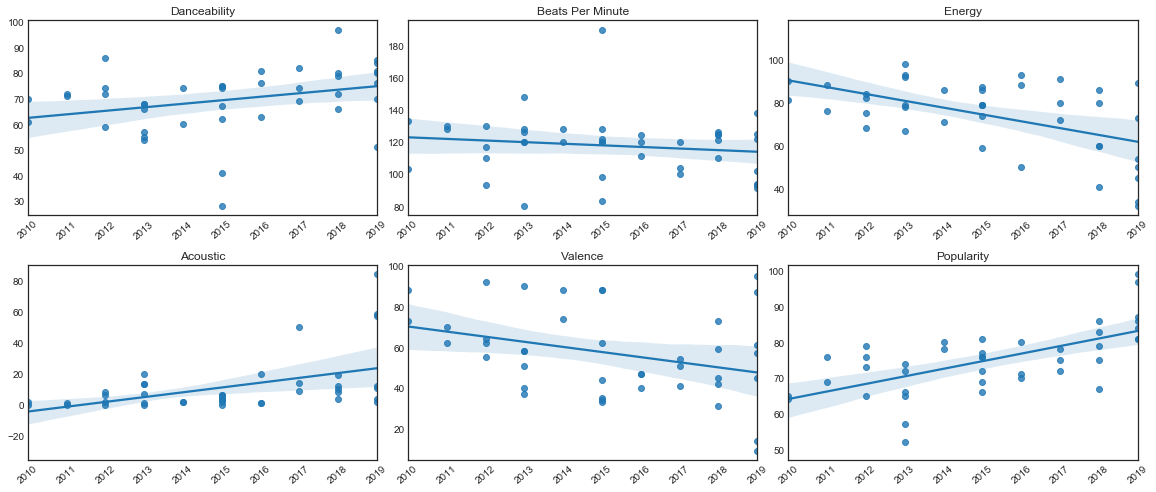

In [57]:
plt.style.use('seaborn-white')
plt.figure(figsize=(16, 10))

plt.subplot(331)
sns.regplot(x='year',y='dnce',data=longevity, fit_reg=True) 
plt.title('Danceability')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=40)
plt.xlim((2010, 2019))

plt.subplot(332)
sns.regplot(x='year',y='bpm',data=longevity, fit_reg=True)
plt.title('Beats Per Minute')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=40)
plt.xlim((2010, 2019))

plt.subplot(333)
sns.regplot(x='year',y='nrgy',data=longevity, fit_reg=True)
plt.title('Energy')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=40)
plt.xlim((2010, 2019))

plt.subplot(334)
sns.regplot(x='year',y='acous',data=longevity, fit_reg=True)
plt.title('Acoustic')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=40)
plt.xlim((2010, 2019))

plt.subplot(335)
sns.regplot(x='year',y='val',data=longevity, fit_reg=True)
plt.title('Valence')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=40)
plt.xlim((2010, 2019))

plt.subplot(336)
sns.regplot(x='year',y='pop',data=longevity, fit_reg=True)
plt.title('Popularity')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=40)
plt.xlim((2010, 2019))

plt.tight_layout()

Attributes like `valence` and `energy` are trending downwards and `danceability` and `acoustic` are trending upwards for the artists that have had "staying power", which coincides with our original analysis of what we've been seeing for music as a whole for this past decade. 

### Yearly Breakdown

Let's see the year-by-year values for our staying power artists and compare them to the newcomers (artists with their first hit in 2017 and beyond).

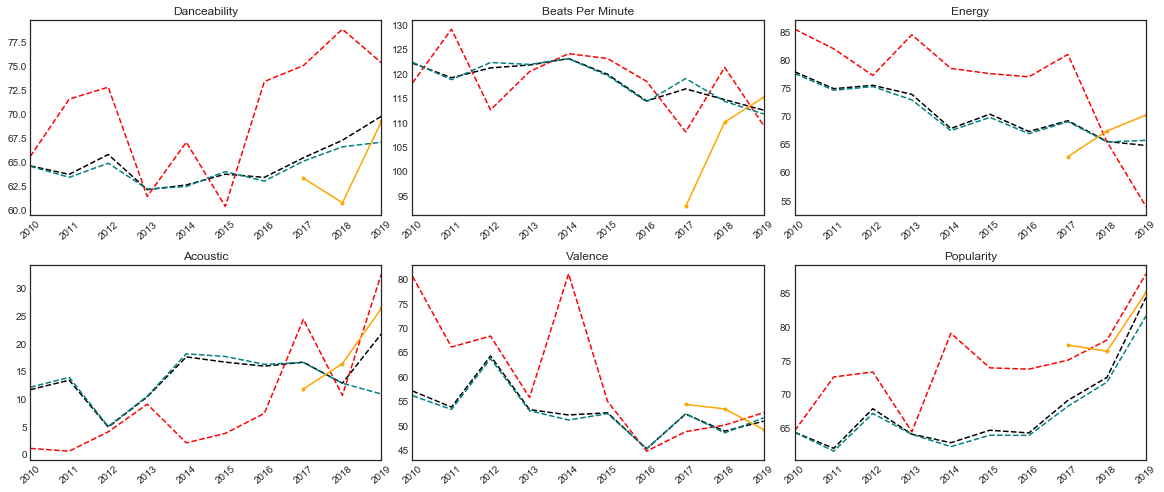

In [58]:
long_pivot = longevity.pivot_table(index='year', aggfunc='mean')
nonlong_pivot = nonlongevity.pivot_table(index='year', aggfunc='mean')
new_artists_pivot = newartists.pivot_table(index='year', aggfunc='mean')

plt.style.use('seaborn-white')
plt.figure(figsize=(16, 10))

plt.subplot(331)
df_pivot['dnce'].plot.line(color='black', style='--')
long_pivot['dnce'].plot.line(color='red', style='--')
nonlong_pivot['dnce'].plot.line(color='teal', style='--')
new_artists_pivot['dnce'].plot.line(color='orange', style='.-')
plt.title('Danceability')
plt.xlabel('')
#plt.ylabel('danceability')
plt.xticks(rotation=40)

plt.subplot(332)
df_pivot['bpm'].plot.line(color='black', style='--')
long_pivot['bpm'].plot.line(color='red', style='--')
nonlong_pivot['bpm'].plot.line(color='teal', style='--')
new_artists_pivot['bpm'].plot.line(color='orange', style='.-')
plt.title('Beats Per Minute')
plt.xlabel('')
#plt.ylabel('BPM')
plt.xticks(rotation=40)

plt.subplot(333)
df_pivot['nrgy'].plot.line(color='black', style='--')
long_pivot['nrgy'].plot.line(color='red', style='--')
nonlong_pivot['nrgy'].plot.line(color='teal', style='--')
new_artists_pivot['nrgy'].plot.line(color='orange', style='.-')
plt.title('Energy')
plt.xlabel('')
#plt.ylabel('Energy')
plt.xticks(rotation=40)

plt.subplot(334)
df_pivot['acous'].plot.line(color='black', style='--')
long_pivot['acous'].plot.line(color='red', style='--')
nonlong_pivot['acous'].plot.line(color='teal', style='--')
new_artists_pivot['acous'].plot.line(color='orange', style='.-')
plt.title('Acoustic')
plt.xlabel('')
#plt.ylabel('acoustic')
plt.xticks(rotation=40)

plt.subplot(335)
df_pivot['val'].plot.line(color='black', style='--')
long_pivot['val'].plot.line(color='red', style='--')
nonlong_pivot['val'].plot.line(color='teal', style='--')
new_artists_pivot['val'].plot.line(color='orange', style='.-')
plt.title('Valence')
plt.xlabel('')
#plt.ylabel('valence')
plt.xticks(rotation=40)

plt.subplot(336)
df_pivot['pop'].plot.line(color='black', style='--')
long_pivot['pop'].plot.line(color='red', style='--')
nonlong_pivot['pop'].plot.line(color='teal', style='--')
new_artists_pivot['pop'].plot.line(color='orange', style='.-')
plt.title('Popularity')
plt.xlabel('')
plt.xticks(rotation=40)

plt.tight_layout()

These charts are broken down in several ways:

`Black - Entire Dataset
Red - Legends
Orange - New artists
Teal - Rest of the Industry (not new artists and not artists from before 2014 that have had hit 2019 songs)`


Looking at the year-over-year metrics, artists with "staying power" (red line) are all over the place when it comes to their hit songs. Seemingly every other year there tends to be sharp increases or declines. What this says to me is that these artists with "staying power" can put out any type of music and people will generally like what they hear. Maybe it's not the best for identifying greater macro-trends. 

#### Conclusion
As we look at this past decade, we can make a couple inferences on where music is heading; less energy and higher danceability with more of an emphasis on using natural instruments instead of electronic instruments. As we looked deeper, we found that music can be a bit unpredictable by nature, certain years may see a sharp drop when it comes to certain attributes. It will be interesting to see what the macrotrends will be as we move into the new decade. 

##### Next Steps
* Get Spotify's demographic information and understand how that has changed over the years. 
* See if we'd receive more steady results when analyzing "one-hit wonders" since there shouldn't be as much bias involved.
* Keep an eye on new singles by Maroon 5, Selena Gomez, Calvin Harris, Jonas Brothers, and Chris Brown in 2020 and what kind of attributes are utilized. 
* Justin Beiber recently came under fire for [begging fans](https://www.hotnewhiphop.com/roddy-ricch-defeats-justin-bieber-on-the-charts-and-the-internet-has-jokes-news.100874.html) to stream his new single "Yummy". See if there is a way to find the attributes to that song and compare if it is indeed matching the trends that we are seeing. 